In [1]:
import os
import openai
from abcli import file
from abcli.modules.cookie import cookie
from openai_cli import NAME, VERSION
import matplotlib.pyplot as plt
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"using {NAME}-{VERSION}.")

using openai_cli-2.82.1.


In [2]:
openai.api_key = os.environ["OPENAI_API_KEY"] = cookie["openai_api_key"]

In [3]:
prompt = """"Write a python function named runme_001 
that inputs an image as a numpy array
and uses opencv vector functions 
to return a darker version of the input image
without running a for loop on the pixels.
"""

In [4]:
response = openai.Completion.create(
  model="text-davinci-003",
  prompt=prompt,
  max_tokens=2000,
)

assert len(response["choices"]) == 1

code = response["choices"][0]["text"]
logger.info(f"code: {code}")

message='Request to OpenAI API' method=post path=https://api.openai.com/v1/completions
message='OpenAI API response' path=https://api.openai.com/v1/completions processing_ms=3359 request_id=2f350b16d13d8ad4a8be8a76d24f972d response_code=200
code: 
import cv2
import numpy as np

def runme_001(src):
    # Create a darkening mask
    mask = np.ones(src.shape, dtype="uint8") * 75 

    # Apply the mask with the multiply function from opencv 
    res = cv2.multiply(src, mask) 
    return res


In [5]:
exec(code)

In [6]:
input_image = file.load_image(os.path.join(os.getenv("HOME",""),"git/blue-bracket/images/portal-34.jpg"))[1]

In [7]:
image_output = runme_001(input_image)
assert image_output.__class__.__name__ == "ndarray"

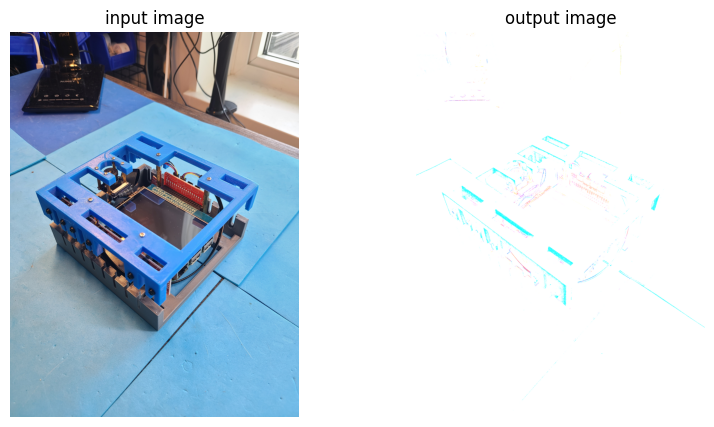

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(input_image)
axes[0].axis('off') 
axes[0].set_title("input image")

axes[1].imshow(image_output)
axes[1].axis('off')
axes[1].set_title("output image")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1)
plt.show()

In [9]:
# END